http://lance-modis.eosdis.nasa.gov/imagery/subsets/?mosaic=Arctic.2015152.terra.4km

In [1]:
%matplotlib inline

In [2]:
from numpy import asarray, zeros, reshape, double, arange, \
                  ma, log10, diff, mean, flipud, floor, pi, sqrt, size, fliplr, meshgrid, exp, cos, tan, radians, concatenate

In [44]:
# from IPython.html import widgets
from ipywidgets import widgets, interact
# [widget for widget in dir(widgets) if widget.endswith('Widget')]

In [4]:
import datetime

import matplotlib.pyplot as plt

from matplotlib.mlab import find

from PIL import Image

from scipy.signal import wiener

import os

__author__   = 'Alexander Myasoedov'
__email__    = 'mag@rshu.ru'
__created__  = datetime.datetime(2014, 10, 28)
__modified__ = datetime.datetime(2015, 6, 19)
__version__  = "1.0"
__status__   = "Development"

# Files to process

In [5]:
# Prirazlomnoe
inpath = '/media/SOLabNFS2/tmp/different_SAR/sentinel-1/Prirazlomnoe/'
fileNameList = [i for i in os.listdir(inpath) if i.endswith('.zip')]
# fileNameList[0,1] - no ncep wind
fn = fileNameList[-1]

In [6]:
inpath = '/media/SOLabNFS2/store/satellite/sentinel-1/'
# RectSphereBivariateSpline uses lats and lons within the intervals (0, pi), (0, 2pi).
fn = 'S1A_IW_GRDH_1SSV_20141119T033556_20141119T033621_003345_003E18_B645.zip'
# wind_speed is red colored, sigma0w is masked at WMS server - why?
# http://wms1.solab.rshu.ru/wms?variable=sigma0w&granule=S1A_IW_GRDH_1SDV_20141117T051942_20141117T052009_003317_003D7F_38DD&projection=EPSG%3A3413&polarization=vv&vmin=0&vmax=254&zoom=0&x=0&y=0
fn = 'S1A_IW_GRDH_1SDV_20141117T051942_20141117T052009_003317_003D7F_38DD.zip'
# sigma0w is masked and wind_speed is not! Must be the other way
fn = 'S1A_IW_GRDH_1SDV_20141025T170900_20141025T170936_002989_00366B_C289.zip'
# No wind_speed and sigma0w
# fn = 'S1A_EW_GRDM_1SSH_20150706T035457_20150706T035511_006685_008EFE_47A6.zip'

# Error on Wind speed interpolation - if LonLims out of -180:+180 range after interpolation => still not very presize
# fn = 'S1A_EW_GRDM_1SSH_20150603T222335_20150603T222440_006215_0081CB_A701.zip'

# Checking Pandas statistics not working
# fn = 'S1A_EW_GRDH_1SDH_20141014T112319_20141014T112338_002825_0032F5_0C8D.zip'


In [7]:
from readS1 import *
import readS1
reload(readS1)

<module 'readS1' from 'readS1.pyc'>

# Setting RESOLUTION

In [8]:
RESOLUTION = 400

In [9]:
s1 = readS1.readS1(inpath=inpath, fn=fn, resolution=RESOLUTION)
# s1.__dict__['raw_counts']

Available polarizations: '[u'vv', u'vh']'
Reading raw_counts: 'vv' polarization


/usr/local/lib/python2.7/dist-packages/PIL/Image.py:2238: DecompressionBombWarning: Image size (599464288 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
readS1.py:409: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  im = im[ext[0]:ext[2],ext[1]:ext[3]]
readS1.py:412: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  im = im.reshape(sha).mean(-1).mean(1)


Reading raw_counts: 'vh' polarization
Interpolating LUTs: 'vv' polarization
Interpolating LUTs: 'vh' polarization


readS1.py:773: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  line_2  = arange(arrShape[0])[ext[0]:ext[2]][::spa[0]]
readS1.py:774: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pixel_2 = arange(arrShape[1])[ext[1]:ext[3]][::spa[1]]


In [10]:
# get vars from s1 class
for k, v in s1.__dict__.iteritems():
    locals()[k]=v

In [11]:
sigma0, lats_2, lons_2

({u'vh': array([[ -1.83663308e-05,  -1.77758315e-05,  -1.87274149e-05, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [ -1.49569640e-05,  -1.38721138e-05,  -1.62711894e-05, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  6.68251315e-04,   6.02947718e-04,   6.12322128e-04, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         ..., 
         [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
            8.02049899e-06,   1.06398587e-05,   1.26515386e-05],
         [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
            2.96366115e-06,   3.71339881e-06,   4.83289718e-06],
         [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
            1.80512819e-06,   2.88458888e-06,   2.70289562e-06]]),
  u'vv': array([[  1.65246161e-06,   5.71086867e-06,   3.24460012e-06, ...,
            0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
         [  1.76439501e-05,   2

In [12]:
sigma0

{u'vh': array([[ -1.83663308e-05,  -1.77758315e-05,  -1.87274149e-05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [ -1.49569640e-05,  -1.38721138e-05,  -1.62711894e-05, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  6.68251315e-04,   6.02947718e-04,   6.12322128e-04, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
           8.02049899e-06,   1.06398587e-05,   1.26515386e-05],
        [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
           2.96366115e-06,   3.71339881e-06,   4.83289718e-06],
        [ -2.19426180e-05,  -2.16713280e-05,  -2.14065659e-05, ...,
           1.80512819e-06,   2.88458888e-06,   2.70289562e-06]]),
 u'vv': array([[  1.65246161e-06,   5.71086867e-06,   3.24460012e-06, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.76439501e-05,   2.63282239e-05,  

In [13]:
import distancelib

# Reduce resolution to 40m
# scale = 40/round(mean(asarray(distancelib.getPixelResolution(lats_2, lons_2, lons_2.shape, 'km'))*1e3))
scale = 1

print "Scale set to: \'%s\' " %scale

Scale set to: '1' 


# Filtering

In [14]:
sigma0w = {}
roughness = {}
    
# Lee-Wiener filtering blures to much the SAR scenes, so we use it only for wind field
for p in polarization:
    print "Filtering Image: \'%s\' polarization" %p
    sigma0w[p] = wiener(sigma0[p][::scale,::scale], mysize=(3,3), noise=None)
#     sigma0w[p] = sigma0[p]

Filtering Image: 'vv' polarization
Filtering Image: 'vh' polarization


/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:621: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:621: RuntimeWarning: overflow encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python2.7/dist-packages/scipy/signal/signaltools.py:621: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


In [15]:
# S1 Pixel resolution
# we use pxlResSAR for further GSHHS rasterizing and reprojecting data with pyresample

lonlim = (lons_2[::scale,::scale].min(),lons_2[::scale,::scale].max())
latlim = (lats_2[::scale,::scale].min(),lats_2[::scale,::scale].max())

# enlarge lonlims for cropping a bit larger area for masking
lonlimGSHHS = (lonlim[0]-1.0, lonlim[1]+1.0)
latlimGSHHS = (latlim[0]-1.0, latlim[1]+1.0)


# Get first guess pixel resolution
pxlResSARm  = asarray(distancelib.getPixelResolution(lats_2[::scale,::scale], \
                                                     lons_2[::scale,::scale], \
                                                     lons_2[::scale,::scale].shape, 'km'))*1e3
pxlResSARdeg  = asarray(distancelib.getPixelResolution(lats_2[::scale,::scale], \
                                                       lons_2[::scale,::scale], \
                                                       lons_2[::scale,::scale].shape, 'deg'))

print "S1 cell resolution, %s deg"  % str(pxlResSARdeg)
print "S1 cell resolution, %s m"  % str(pxlResSARm)

S1 cell resolution, [ 0.00364437  0.00357831] deg
S1 cell resolution, [ 404.96249167  397.62225595] m


In [16]:
from readS1 import *
import readS1
reload(readS1)

from pyproj import Proj

import pyresample as pr
# import sys
# sys.path.append('/home/mag/Documents/repos/solab/pyresample2/')
# sys.path.append('/home/mag/Documents/repos/solab/pyresample2/pyresample2/')
# import pyresample2 as pr

# Define areas with pyresample
swath_def = pr.geometry.SwathDefinition(lons=lons_2[::scale,::scale], lats=lats_2[::scale,::scale])

area_def_4326 = swath_area_def(name='Temporal SWATH EPSG Projection 4326', proj='eqc',
                          lonlim=lonlimGSHHS, latlim=latlimGSHHS, ellps="WGS84", res=pxlResSARm)

up, down, left, right:  58.0 53.0 5.0 12.0


In [17]:
# Get the SAR pixel resolution from the area_def for further identical shapes
up    = min(latlimGSHHS)
down  = max(latlimGSHHS)
left  = min(lonlimGSHHS)
right = max(lonlimGSHHS)
area_extent_deg = (left, down, right, up)

area_extent_deg_shape = area_def_4326.shape

pxlResSARdeg = asarray( (abs(area_extent_deg[2] - area_extent_deg[0]) / float(area_extent_deg_shape[1]), \
                abs(area_extent_deg[3] - area_extent_deg[1]) / float(area_extent_deg_shape[0])) )

pxlResSARm = asarray( (area_def_4326.pixel_size_x, area_def_4326.pixel_size_y) )
print "S1 cell resolution, %s deg"  % str(pxlResSARdeg)
print "S1 cell resolution, %s m"  % str(pxlResSARm)


S1 cell resolution, [ 0.00363889  0.00357457] deg
S1 cell resolution, [ 405.07890064  397.91879765] m


In [18]:
# Apply Mask from GSHHS

import gshhs_rasterize
reload(gshhs_rasterize)

# ESRI shapefile containing land polygons
shapefile = '/media/SOLabNFS/store/auxdata/coastline/GSHHS_shp/f/GSHHS_f_L1.shp'

# reproject GSHHS onto S1 grid before calculations
print "Rasterizing Land Mask..."
mask_arr_4326 = gshhs_rasterize.gshhs_rasterize_4326(lonlimGSHHS, latlimGSHHS, \
                                     pxlResSARdeg, area_def_4326.shape, True, \
                                     shapefile)

Rasterizing Land Mask...


In [19]:
# mask_arr_swath, scaling, intercept = pr.kd_tree.resample_nearest(area_def_4326, mask_arr_4326, swath_def, \
#                                              radius_of_influence=4*pxlResSARm.max(), epsilon=0.5, fill_value=None)
mask_arr_swath = pr.kd_tree.resample_nearest(area_def_4326, mask_arr_4326, swath_def, \
                                             radius_of_influence=4*pxlResSARm.max(), epsilon=0.5, fill_value=None)

In [20]:
print area_def_4326.shape, mask_arr_4326.shape
print mask_arr_swath.shape, sigma0w[p].shape, swath_def.shape

(1265, 1818) (1265, 1818)
(594, 630) (594, 630) (594, 630)


In [21]:
# Check if Land mask is too large don't process the wind
from numpy import double
land = double(ma.count_masked(mask_arr_swath)) # number of masked (Land) elements
water =  double(ma.count(mask_arr_swath))
if water/land < 0.15:
    print "not much water, don't process"

In [22]:
from scipy.signal import medfilt

# ROUGHNESS

In [23]:
# # Earlier form Fabrice - simplyfied
# pol = product.get_sph().get_field('MDS1_TX_RX_POLAR').get_elem()
# if pol == 'H/H':
#     ph = (2.20495, -14.3561e-2, 11.28e-4)
#     sigma0_hh_ref = exp( ( ph[0]+incident_angle*ph[1]+incident_angle**2*ph[2])*log(10) )
#     roughness = sigma0w/sigma0_hh_ref
# elif pol == 'V/V':
#     pv = (2.29373, -15.393e-2, 15.1762e-4)
#     sigma0_vv_ref = exp( ( pv[0]+incident_angle*pv[1]+incident_angle**2*pv[2])*log(10) )
#     roughness = sigma0w/sigma0_vv_ref


# From sar/cerbere
from cmod_vect import cmod5n_forward as cmod5

def compute_roughness(sigma0, incidence, polarisation):
    """Compute sea surface roughness.

    Parameters
    ----------
    sigma0 : ndarray
        NRCS backscatter.
    incidence : ndarray
        Incidence angle in degrees.
    polarisation : str
        'VV' or 'HH' or 'VH' or 'HV'

    Returns
    -------
    ndarray
    """
    if polarisation == 'VV' or polarisation == 'V/V' or polarisation == 'vv': # Use cmod5
        sigma0_vv = cmod5(10, 45, incidence)
        return sigma0/sigma0_vv
    elif polarisation == 'HH' or polarisation == 'H/H' or polarisation == 'hh': # Use cmod5 and Thompson polarisation ratio
        sigma0_vv = cmod5(10, 45, incidence)
        alpha = 0.7
        polrat = (1 + 2*tan(incidence*pi/180)**2)**2 / \
                 (1 + alpha*tan(incidence*pi/180)**2)**2
        return sigma0/sigma0_vv*polrat
    elif polarisation == 'VH' or polarisation == 'HV' \
        or polarisation == 'V/H' or polarisation == 'H/V' \
        or polarisation == 'vh'  or polarisation == 'hv': # Use simple model
        # nrcs_vh_db = 0.580*wsp - 35.652
        # nrcs_vh_lin = 10^(nrcs_vh_db/10.)
        sigma0_cross = 10**((0.58*10-35.652)/10)
        return sigma0/sigma0_cross
    else:
        raise Exception('Unknown polarisation : '+polarisation)

In [24]:
if len(polarization[0])>=2: # if 2 polarizations
    for p in polarization:
        print "Roughness: \'%s\' polarization" %p
        roughness[p] = compute_roughness(sigma0[p], incidenceAngle_2[p], p)
#         roughness[p] = ma.masked_where(mask_arr_swath.mask, sigma0w[p])
elif len(polarization[0])==1: # if only 1 polarization
    p = polarization
    print "Roughness: \'%s\' polarization" %p
    roughness[p] = compute_roughness(sigma0[p], incidenceAngle_2[p], p)
#     roughness[p] = ma.masked_where(mask_arr_swath.mask, sigma0w[p])

Roughness: 'vv' polarization
Roughness: 'vh' polarization


# Nice Image (Roughness)

In [25]:
# sigma0wAvg = {}
# roughnessNrmlzd = {}

# if len(polarization[0])>=2: # if 2 polarizations
#     for p in polarization:
#         print "Nice Image: \'%s\' polarization" %p
#         roughness[p] = ma.masked_where(mask_arr_swath.mask, sigma0w[p])
#         sigma0wAvg[p] = ma.min(roughness[p], axis=0)
#         roughnessNrmlzd[p] = (roughness[p]-sigma0wAvg[p])
# #         roughnessNrmlzd[p] = (roughnessNrmlzd[p] - ma.median(roughnessNrmlzd[p], axis=0))/(ma.median(roughnessNrmlzd[p], axis=0))
#         roughnessNrmlzd[p] = (roughnessNrmlzd[p])/medfilt(ma.mean(roughnessNrmlzd[p], axis=0),333)
# elif len(polarization[0])==1: # if only 1 polarization
#     p = polarization
#     print "Nice Image: \'%s\' polarization" %p
#     roughness[p] = ma.masked_where(mask_arr_swath.mask, sigma0w[p])
#     sigma0wAvg[p] = ma.min(roughness[p], axis=0)
#     roughnessNrmlzd[p] = (roughness[p]-sigma0wAvg[p])/sigma0wAvg[p]
# # plt.imshow(roughnessNrmlzd['vv'], vmin=-1, vmax=3)
# # plt.imshow(roughnessNrmlzd['vh'], vmin=-1, vmax=3)

# Adding Model wind

In [26]:
# Adding Model wind

# import xmltodict

# zf = zipfile.ZipFile(inpath+fn, 'r')
# manifest = zf.read(fn[:-4] + '.SAFE/manifest.safe')
# manifest = xmltodict.parse(manifest) # Parse the read document string
# zf.close()

Objects = manifest['xfdu:XFDU']['metadataSection']['metadataObject']
for Object in Objects:
    try:
        startTime = datetime.datetime.strptime(
            Object['metadataWrap']['xmlData']['safe:acquisitionPeriod']['safe:startTime'],
            "%Y-%m-%dT%H:%M:%S.%f"
        )
        break
    except:
        pass

ncepGFSmodelWind = ncepGFSmodel(startTime, lats_2, lons_2)

In [27]:
# Reprojecting data

import distancelib

# Pixel resolution
# we use pxlResWind/pxlResSAR for further pyresample radius_of_influence and sigmas
pxlResWind = asarray(distancelib.getPixelResolution(ncepGFSmodelWind['lats_wind'], \
                                                    ncepGFSmodelWind['lons_wind'], \
                                                    ncepGFSmodelWind['lons_wind'].shape, 'km'))
# pxlResSAR  = asarray(distancelib.getPixelResolution(lats_2, lons_2, lons_2.shape, 'km'))*1e3

# Note pxlResWind is in KM, multiply by 1e3 for meters
print "S1 cell resolution, %s m"  % pxlResSARm
print "Wind cell resolution, %s km" % pxlResWind

S1 cell resolution, [ 405.07890064  397.91879765] m
Wind cell resolution, [ 48.59100667  27.69318231] km


In [28]:
from scipy.interpolate import RectSphereBivariateSpline

def ncepGFSmodel2swath(lats, lons, data, lats_2, lons_2):

    func = RectSphereBivariateSpline(lats, lons, data)
    data_2 = func.ev(lats_2.ravel(),\
                     lons_2.ravel())\
                     .reshape(lats_2.shape)
    return data_2

In [29]:
# reproject NCEP onto S1 grid before calculations
# Using RectSphereBivariateSpline - Bivariate spline approximation over a rectangular mesh on a sphere
# as it is much more efficiant for full resolution
# as well as smoothes nicely the image

# We don't want to work with full res wind so scaling the image for about 100m resolution
# Adjust scale to get appropriate value
# scale = 5

lts = ncepGFSmodelWind['lats_wind']
lns = ncepGFSmodelWind['lons_wind']

ncepGFSmodelWindSwath = {}
# check that lns increasing, if not
if ~all(diff(lns[0,:]) > 0):
    lns_ = lns[0,:]
    # we must start lns from -180 increasing to +180
    # so we reconcatenate lns array and data array, by cropping part of array and putting in front
    lns_ = concatenate((lns_[(lns_>=-180) & (lns_<0)], lns_[(lns_>=0)]),0)
    ncepGFSmodelWindSwath['wind_speed'] = (ncepGFSmodelWind['wind_speed'])
    ncepGFSmodelWindSwath['wind_speed'] = concatenate((ncepGFSmodelWind['wind_speed'][:,(lns_>=-180) & (lns_<0)],\
                                                  ncepGFSmodelWind['wind_speed'][:,(lns_>=0)]),1)
    ncepGFSmodelWindSwath['wind_dir'] = (ncepGFSmodelWind['wind_dir'])
    ncepGFSmodelWindSwath['wind_dir'] = concatenate((ncepGFSmodelWind['wind_dir'][:,(lns_>=-180) & (lns_<0)],\
                                                  ncepGFSmodelWind['wind_dir'][:,(lns_>=0)]),1)
    # only then we do interpolate

lts_2 = lats_2[::scale,::scale]
lns_2 = lons_2[::scale,::scale]

# RectSphereBivariateSpline uses lats and lons within the intervals (0, pi), (0, 2pi).
# Make sure the latitude is between 0 .. 180
if lts_2.min()<0:
    lts_2 = lts_2 + 90
    lts   = lts   + 90
if lns_2.min()<0:
    lns_2 = lns_2 + 180
    lns   = lns   + 180

try:
    ncepGFSmodelWindSwath['wind_speed'] = griddata((lts.flatten(), lns.flatten()), (ncepGFSmodelWind['wind_speed']).flatten(), (lts_2, lns_2), method='cubic')
    ncepGFSmodelWindSwath['wind_dir'] = griddata((lts.flatten(), lns.flatten()), (ncepGFSmodelWind['wind_dir']).flatten(), (lts_2, lns_2), method='cubic')
    ncepGFSmodelWindSwath['u'] = griddata((lts.flatten(), lns.flatten()), (ncepGFSmodelWind['u']).flatten(), (lts_2, lns_2), method='cubic')
    ncepGFSmodelWindSwath['v'] = griddata((lts.flatten(), lns.flatten()), (ncepGFSmodelWind['v']).flatten(), (lts_2, lns_2), method='cubic')
except:
#     ncepGFSmodelWindSwath['wind_speed']  = RectBivariateSpline(lts, lns, flipud(ncepGFSmodelWindSwath['wind_speed']), kx=2, ky=2)(lts_2, lns_2)
    pass


# FOR SOME REASON RectSphereBivariateSpline doesn't work very good, using griddata instead

# lts = ncepGFSmodelWind['lats_wind'][:,0]
# lns = ncepGFSmodelWind['lons_wind'][0,:]

#     ncepGFSmodelWindSwath = {}
# # check that lns increasing, if not
# if ~all(diff(lns) > 0):
#     # we must start lns from -180 increasing to +180
#     # so we reconcatenate lns array and data array, by cropping part of array and putting in front
#     lns = concatenate((lns[(lns>=-180) & (lns<0)], lns[(lns>=0)]),0)
#     ncepGFSmodelWindSwath['wind_speed'] = (ncepGFSmodelWind['wind_speed'])
#     ncepGFSmodelWindSwath['wind_speed'] = concatenate((ncepGFSmodelWind['wind_speed'][:,(lns>=-180) & (lns<0)],\
#                                                   ncepGFSmodelWind['wind_speed'][:,(lns>=0)]),1)
#     ncepGFSmodelWindSwath['wind_dir'] = (ncepGFSmodelWind['wind_dir'])
#     ncepGFSmodelWindSwath['wind_dir'] = concatenate((ncepGFSmodelWind['wind_dir'][:,(lns>=-180) & (lns<0)],\
#                                                   ncepGFSmodelWind['wind_dir'][:,(lns>=0)]),1)
#     # only then we do interpolate

# lts_2 = lats_2[::scale,::scale]
# lns_2 = lons_2[::scale,::scale]

# # RectSphereBivariateSpline uses lats and lons within the intervals (0, pi), (0, 2pi).
# # Make sure the latitude is between 0 .. 180
# if lts_2.min()<0:
#     lts_2 = lts_2 + 90
#     lts   = lts   + 90
# if lns_2.min()<0:
#     lns_2 = lns_2 + 180
#     lns   = lns   + 180

# # Converting lat/lon fields to radians as RectSphereBivariateSpline needs
# lts_2 = lts_2*pi/180
# lns_2 = lns_2*pi/180
# lts = lts*pi/180
# lns = lns*pi/180

# try:
#     ncepGFSmodelWindSwath['wind_speed'] = ncepGFSmodel2swath(lts, lns, (ncepGFSmodelWind['wind_speed']), lts_2, lns_2)
#     ncepGFSmodelWindSwath['wind_dir']   = ncepGFSmodel2swath(lts, lns, (ncepGFSmodelWind['wind_dir']),   lts_2, lns_2)
#     ncepGFSmodelWindSwath['u']   = ncepGFSmodel2swath(lts, lns, (ncepGFSmodelWind['u']),   lts_2, lns_2)
#     ncepGFSmodelWindSwath['v']   = ncepGFSmodel2swath(lts, lns, (ncepGFSmodelWind['v']),   lts_2, lns_2)
# except:
# #     ncepGFSmodelWindSwath['wind_speed']  = RectBivariateSpline(lts, lns, flipud(ncepGFSmodelWindSwath['wind_speed']), kx=2, ky=2)(lts_2, lns_2)
#     pass

pxlResWindSwath = asarray(distancelib.getPixelResolution(lts_2, \
                                                    lns_2, \
                                                    lns_2.shape, 'km'))

print "Interpolated Wind cell resolution, %s km" % pxlResWindSwath

del lts, lns, lts_2, lns_2

Interpolated Wind cell resolution, [ 0.40496249  0.39762226] km


In [30]:
# print lons_2.min(), lons_2.max()

# print ncepGFSmodelWind['lons_wind'][0,:].min(), ncepGFSmodelWind['lons_wind'][0,:].max()

In [31]:
# calculate bearing from initial lats/lons for further wind calculation
# Taking initial values as bearing is more accurate after interpolation than vice versa
bearing = zeros((GEOgrid['lons'].shape[0]-1,GEOgrid['lons'].shape[1]))

for n in range(0,GEOgrid['lons'].shape[1]):
    col = ([GEOgrid['lats'][:-1,n], GEOgrid['lons'][:-1,n]], [GEOgrid['lats'][1:,n], GEOgrid['lons'][1:,n]])
    for m in range(0,GEOgrid['lons'].shape[0]-1):
        bearing[m][n] = distancelib.bearing(asarray(col[0])[:,m], asarray(col[1])[:,m])

# interpolate to raw_counts.shape
bearing_2 = imresize(bearing, sigma0w[p].shape)

In [32]:
def PR_Mouche(theta, phi):

    A_0 = 0.00650704
    B_0 = 0.128983
    C_0 = 0.992839
    A_HALF_PI = 0.00782194
    B_HALF_PI = 0.121405
    C_HALF_PI = 0.992839
    A_PI = 0.00598416
    B_PI = 0.140952
    C_PI = 0.992885

    P_0 = A_0 * exp(B_0* theta) + C_0
    P_HALF_PI = A_HALF_PI * exp(B_HALF_PI* theta) + C_HALF_PI
    P_PI = A_PI * exp(B_PI* theta) + C_PI
    
    C0 = (P_0 + P_PI + 2 * P_HALF_PI) / 4
    C1 = (P_0 - P_PI) / 2
    C2 = (P_0 + P_PI - 2 * P_HALF_PI) / 4
    
    P = C0 + C1 * cos(radians(phi)) + C2 * cos(radians(2 * phi))
    
    return P

In [33]:
#NB! WINDDIR = 0 WHEN WIND BLOWS TOWARDS RADAR!

p = polarization[0]

wind_dir_model_swath_rel = 90 + bearing_2 - ncepGFSmodelWindSwath['wind_dir']

if p == 'hh':
    PR = PR_Mouche(incidenceAngle_2[p][::scale,::scale], wind_dir_model_swath_rel)
    try:
        from cmod_gpu import rcs2windOpenCl
        wind_speed_asar = rcs2windOpenCl(sar=sigma0w[p]*PR, \
                                         windir=wind_dir_model_swath_rel, \
                                         theta=incidenceAngle_2[p][::scale,::scale])
    except Exception:
        from cmod_vect import rcs2windPar
        wind_speed_asar = rcs2windPar(sigma0w[p]*PR, cmdv=5, \
                                      windir=wind_dir_model_swath_rel, \
                                      theta=incidenceAngle_2[p][::scale,::scale], nprocs=numProcs)
elif p == 'vv':
    try:
        from cmod_gpu import rcs2windOpenCl
        wind_speed_asar = rcs2windOpenCl(sar=sigma0w[p], \
                                         windir=wind_dir_model_swath_rel, \
                                         theta=incidenceAngle_2[p][::scale,::scale])
    except Exception:
        from cmod_vect import rcs2windPar
        wind_speed_asar = rcs2windPar(sigma0w[p], cmdv=5, \
                                      windir=wind_dir_model_swath_rel, \
                                      theta=incidenceAngle_2[p][::scale,::scale], nprocs=numProcs)

Calculating CMOD...
Sigma to Wind LUT...
CMOD elapsed time: 0.305712


(-0.5, 629.5, 593.5, -0.5)

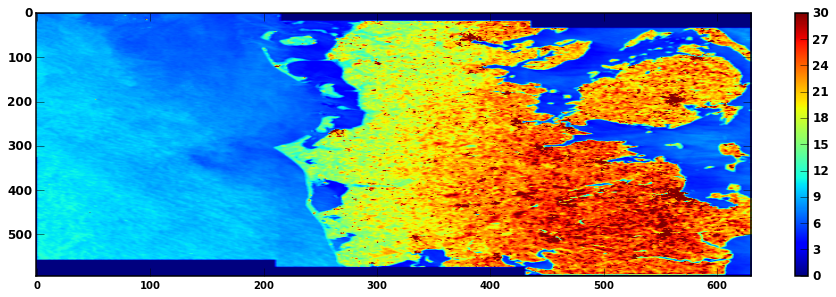

In [34]:
min_speed = 0
max_speed = 30
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.imshow((wind_speed_asar), vmin=min_speed, vmax=max_speed)
plt.jet()
plt.colorbar()
plt.axis('tight')

In [35]:
# Add mask to initial NCEP data
area_def_ncep = pr.geometry.SwathDefinition(lons=ncepGFSmodelWind['lons_wind'], lats=ncepGFSmodelWind['lats_wind'])
# mask_arr_ncep, scaling, intercept = pr.kd_tree.resample_nearest(area_def_4326, mask_arr_4326, area_def_ncep, \
#                                              radius_of_influence=4*pxlResWind.max(), epsilon=0.5, fill_value=None)
mask_arr_ncep = pr.kd_tree.resample_nearest(area_def_4326, mask_arr_4326, area_def_ncep, \
                                             radius_of_influence=4*pxlResWind.max(), epsilon=0.5, fill_value=None)
ncepGFSmodelWind['wind_speed'] = ma.masked_where(mask_arr_ncep.mask, ncepGFSmodelWind['wind_speed'])

# Add mask to ASAR wind and reprojected NCEP
wind_speed_asar = ma.masked_where(mask_arr_swath.mask, wind_speed_asar)
ncepGFSmodelWindSwath['wind_speed'] = ma.masked_where(mask_arr_swath.mask, ncepGFSmodelWindSwath['wind_speed'])

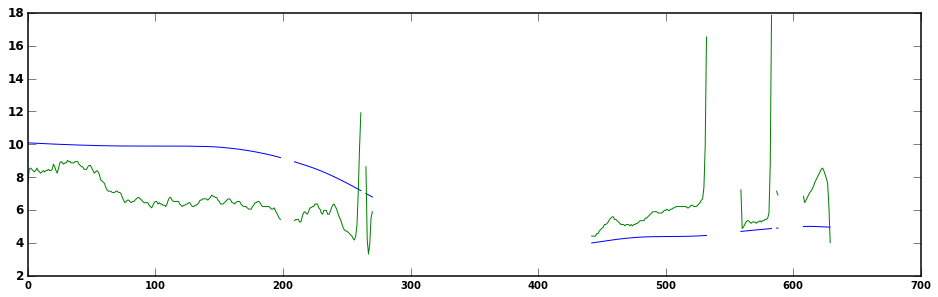

In [36]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.plot(ncepGFSmodelWindSwath['wind_speed'][50,:])
plt.plot(wind_speed_asar[50,:])

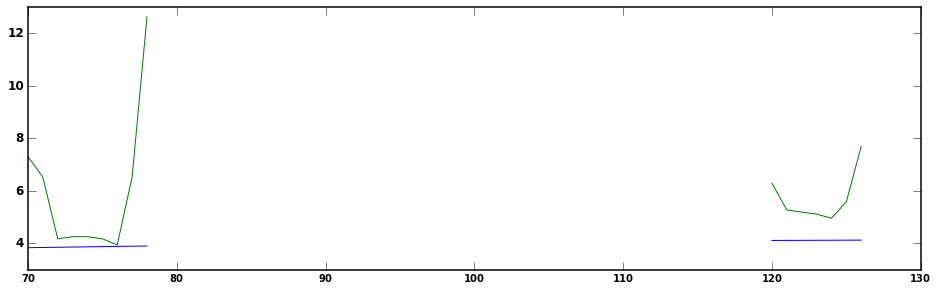

In [37]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.plot(ncepGFSmodelWindSwath['wind_speed'][:,400])
plt.plot(wind_speed_asar[:,400])

## NB! Don't forget to flipud when bearing.mean() >200
## NB! Don't forget to fliplr when bearing.mean() < 200

In [38]:
print 'bearing = %.2f' % bearing.mean()

if bearing.mean() < 200:
    wind_speed_asar = fliplr(wind_speed_asar)
    lats_2 = fliplr(lats_2)
    lons_2 = fliplr(lons_2)
    for k, v in ncepGFSmodelWindSwath.iteritems():
        ncepGFSmodelWindSwath[k] = fliplr(v)
#     for k, v in roughnessNrmlzd.iteritems():
#         roughnessNrmlzd[k] = fliplr(v)
    for k, v in sigma0w.iteritems():
        sigma0w[k] = fliplr(v)
    for k, v in sigma0.iteritems():
        sigma0[k] = fliplr(v)
    for k, v in roughness.iteritems():
        roughness[k] = fliplr(v)
elif bearing.mean() > 200:
    wind_speed_asar = flipud(wind_speed_asar)
    lats_2 = flipud(lats_2)
    lons_2 = flipud(lons_2)
    for k, v in ncepGFSmodelWindSwath.iteritems():
        ncepGFSmodelWindSwath[k] = flipud(v)
#     for k, v in roughnessNrmlzd.iteritems():
#         roughnessNrmlzd[k] = flipud(v)
    for k, v in sigma0w.iteritems():
        sigma0w[k] = flipud(v)
    for k, v in sigma0.iteritems():
        sigma0[k] = flipud(v)
    for k, v in roughness.iteritems():
        roughness[k] = flipud(v)
del k,v

bearing = 349.69


bearing = 349.69


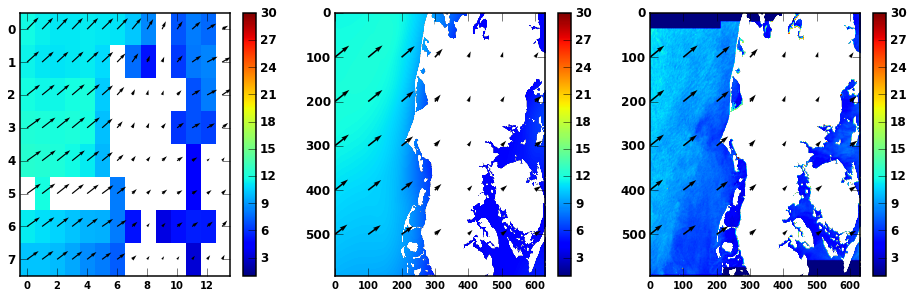

In [39]:
min_speed = 1
max_speed = 30

print 'bearing = %.2f' % bearing.mean()

plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.subplot(131)
plt.imshow(ncepGFSmodelWind['wind_speed'], vmin=min_speed, vmax=max_speed, interpolation="nearest")
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver(ncepGFSmodelWind['u'], ncepGFSmodelWind['v'])

X,Y = meshgrid( arange(0,roughness[p].shape[1]),arange(0,roughness[p].shape[0]) )
U = (ncepGFSmodelWindSwath['u'])
V = (ncepGFSmodelWindSwath['v'])
scl = 100

plt.subplot(132)
plt.imshow((ncepGFSmodelWindSwath['wind_speed']), vmin=min_speed, vmax=max_speed)
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])


plt.subplot(133)
plt.imshow((wind_speed_asar), vmin=min_speed, vmax=max_speed)
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])

In [40]:
print startTime, latlim, lonlim
# print 'http://earth.nullschool.net/#'+startTime.strftime("%Y/%m/%d/")+'%.2d' %(ncepGFSmodelWind['baseHour'])+'00Z/wind/surface/level/orthographic=-327.02,60.84,3000'
print 'http://earth.nullschool.net/#'+startTime.strftime("%Y/%m/%d/")+'%.2d' %(ncepGFSmodelWind['baseHour'])+'00Z/wind/surface/level/orthographic='+str(lonlim[0])+','+str(latlim[0])+',3000'

2014-10-25 17:09:00.678954 (54.323476030167974, 56.845301232911098) (6.3834253685909772, 10.998919529762979)
http://earth.nullschool.net/#2014/10/25/1800Z/wind/surface/level/orthographic=6.38342536859,54.3234760302,3000


# Plotting

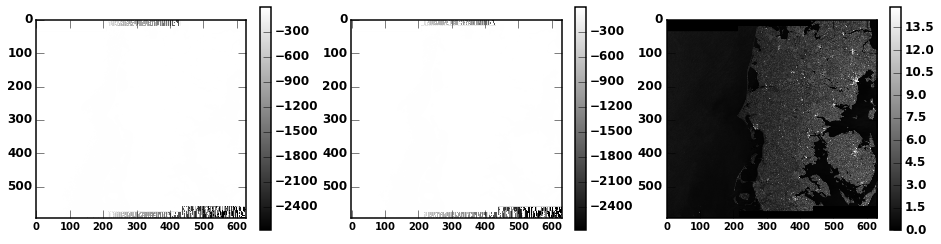

In [41]:
scale = 1
p = 'vv'

from scipy.stats import scoreatpercentile

vmin = None
vmax = None
vmin_r = None
vmax_r = None

if vmin is None:
    vmin = 10*log10(scoreatpercentile(sigma0[p][25:-25, 25:-25], 1))
if vmax is None:
    vmax = 10*log10(scoreatpercentile(sigma0[p][25:-25, 25:-25], 99.9))

if vmin_r is None:
    vmin_r = scoreatpercentile(roughness[p][25:-25, 25:-25], 1)
if vmax_r is None:
    vmax_r = scoreatpercentile(roughness[p][25:-25, 25:-25], 99.9)

plt.close('all')
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(10*log10(sigma0[p][::scale,::scale]), vmin=vmin, vmax=vmax)
plt.gray()
plt.colorbar()
plt.subplot(132)
plt.imshow(10*log10(sigma0w[p][::scale,::scale]), vmin=vmin, vmax=vmax)
plt.gray()
plt.colorbar()
plt.subplot(133)
plt.imshow(roughness[p][::scale,::scale], vmin=vmin_r, vmax=vmax_r)
plt.gray()
plt.colorbar()
plt.show()

In [42]:
# %matplotlib inline
def ntrctv_imshow(p = 'hh', vmi=-1., vma=1., cmap='bone', crop='[:,:]'):
    # check if data type is dictionary and there is no wind
    if type(data) == dict and all(k!='wind_speed' for k in data.iterkeys()):
        plt.figure(figsize=(16,16*double(data[p].shape[0])/double(data[p].shape[1])))
        plt.imshow(eval("data[p]"+str(crop)), vmin=vmi, vmax=vma)
    elif type(data) == dict and any(k=='wind_speed' for k in data.iterkeys()):
        plt.figure(figsize=(16,16*double(data[p].shape[0])/double(data[p].shape[1])))
        X,Y = meshgrid( arange(0,eval("data[p]"+str(crop)).shape[1]),arange(0,eval("data[p]"+str(crop)).shape[0]) )
        U = (data['u'])
        V = (data['v'])
        U = eval("U"+str(crop))
        V = eval("V"+str(crop))
        scl = 100
        plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])
        plt.imshow(eval("data[p]"+str(crop)), vmin=vmi, vmax=vma)
        plt.axis('tight')
    elif type(data) != dict:
        plt.figure(figsize=(16,16*double(data.shape[0])/double(data.shape[1])))
        plt.imshow(eval("data"+str(crop)), vmin=vmi, vmax=vma)
    plt.colorbar()
    plt.set_cmap(cmap)

## Interactive plotting

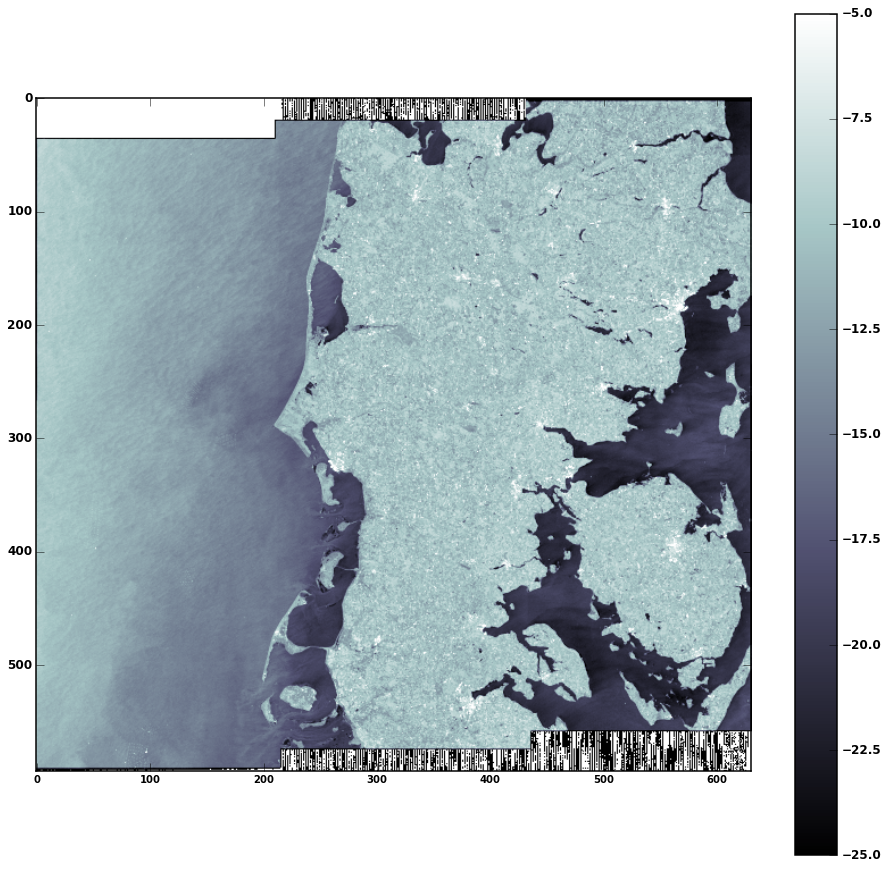

In [45]:
data=10*log10(sigma0[p][::scale,::scale])
ntrctv = interact(ntrctv_imshow, \
                 vmi=widgets.FloatSlider(min=-35, max=5, value=vmin, step=0.5), \
                 vma=widgets.FloatSlider(min=-35, max=5, value=vmax, step=0.5), \
                cmap = ['Greys_r', 'bone', 'RdBu_r'], crop = '[:,:]');
# crop = '[1000:2500,1500:-1]'
# crop = '[600:1400,0:900]' - finnGulf
# crop = '[500:800,600:1000]' - Prirazlomnoe

In [45]:
data=roughnessNrmlzd
# data[] = np.where(data[p]<-1,-1,data[p])
# data[p] = np.where(data[p]>1,1,data[p])
ntrctv = interact(ntrctv_imshow, p = widgets.RadioButtons(description='polarization', options=data.keys()), \
                 vmi=widgets.FloatSlider(min=-2, max=4, value=-2, step=0.5), \
                 vma=widgets.FloatSlider(min=-2, max=4, value=4., step=0.5), \
                cmap = ['bone', 'RdBu_r', 'Greys_r'], crop = '[:,:]');
# crop = '[1000:2500,1500:-1]'
# crop = '[600:1400,0:900]' - finnGulf
# crop = '[500:800,600:1000]' - Prirazlomnoe

NameError: name 'roughnessNrmlzd' is not defined

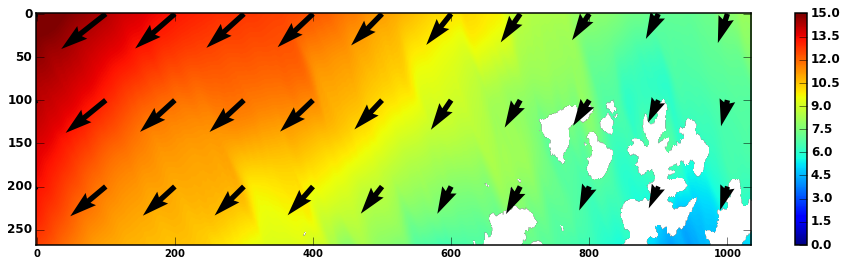

In [46]:
data=ncepGFSmodelWindSwath
wind = wind_speed_asar

ntrctv = interact(ntrctv_imshow, p = widgets.RadioButtons(description='wind speed', options=data.keys()), \
                 vmi=widgets.FloatSlider(min=0, max=30, value=0, step=1), \
                 vma=widgets.FloatSlider(min=0, max=30, value=15., step=1), \
                cmap = ['jet'], crop = '[:,:]');
# crop = '[600:1400,0:900]'

In [ ]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [ ]:
# epsg 4326
from numpy import ceil

oPath = inpath

data = 10*log10(sigma0w[polarization[0]])[::scale,::scale]

plt.close('all')
plt.figure(figsize=(16,16*double(data.shape[0])/data.shape[1]))

# clm=(floor(data.min()), ceil(data.max()))
clm=(-20,-5)

# Lat/Lon coords of image corners
# ll_lat = lats_2.min()
# ur_lat = lats_2.max()
# ll_lon = lons_2.min()
# ur_lon = lons_2.max()
ll_lat = latlim[0]
ur_lat = latlim[1]
ll_lon = lonlim[0]
ur_lon = lonlim[1]
m = Basemap(epsg=4326, llcrnrlat=ll_lat, urcrnrlat=ur_lat,\
            llcrnrlon=ll_lon, urcrnrlon=ur_lon, \
            resolution='i')

# m.bluemarble()
# m.etopo()

x,y=m(lons_2[::scale,::scale],lats_2[::scale,::scale])
# cs=m.pcolormesh(x,y,roughnessNrmlzd[polarization[0]][::scale,::scale],cmap=cm.Greys_r, vmin=-1, vmax=2)#,ps,cmap=cm.jet,extend='max')
cs = m.pcolormesh(x,y,data)#,ps,cmap=cm.jet,extend='max')
cs.axis='tight'
plt.gray()
plt.clim(clm)
cb = plt.colorbar(cs, shrink=0.5, extend='both', \
                  orientation='horizontal', pad=0.1, aspect=33)
# A working example (for any value range) with 5 ticks along the bar is:
m0=(clm[0])                      # colorbar min value
m5=(clm[1])                      # colorbar max value
m1=round((1*(m5-m0)/5.0 + m0),2) # colorbar mid value 1
m2=round((2*(m5-m0)/5.0 + m0),2) # colorbar mid value 2
m3=round((3*(m5-m0)/5.0 + m0),2) # colorbar mid value 3
m4=round((4*(m5-m0)/5.0 + m0),2) # colorbar mid value 4
cb.set_ticks([m0,m1,m2,m3,m4,m5])
cb.set_ticklabels([m0,m1,m2,m3,m4,m5])
cb.update_ticks()
cb.set_label('Sigma0, [dB]')

# set the step of Lat/Lon to plot
# stepLon = round((lons_2.max()-lons_2.min())/4, 0)
# stepLat = round((lats_2.max()-lats_2.min())/4, 0)
stepLon = 1
stepLat = 1
# fool proofing, so that ronded value is not 0, but 0.05 in case of small area
if stepLat == 0: stepLat=0.05
if stepLon == 0: stepLon=0.05

# m.drawmeridians(arange(round(ll_lon,1),round(ur_lon,1), stepLon), \
#                 labels=[0,0,0,1], color='w', dashes=[5,5], linewidth=0.5)
# m.drawparallels(arange(round(ll_lat,1),round(ur_lat,1), stepLat), \
#                 labels=[1,0,0,0], color='w', dashes=[5,5], linewidth=0.5, rotation=90)
m.drawmeridians(arange(round(lons_2.min(),1),round(lons_2.max(),1), stepLon), \
                labels=[0,0,0,1], color='w', dashes=[5,5], linewidth=0.5)
m.drawparallels(arange(round(lats_2.min(),1),round(lats_2.max(),1), stepLat), \
                labels=[1,0,0,0], color='w', dashes=[5,5], linewidth=0.5, rotation=90)
m.drawcoastlines(linewidth=1,color='coral')
# m.fillcontinents(color='coral')

plt.tight_layout()
plt.title(fn[:-39] + '_' + polarization[0])

oFileName = os.path.join(oPath, fn[:-39] + '_' + polarization[0] + '_sigma0w_bm.png')
# plt.savefig(oFileName, facecolor='w', edgecolor='w', \
#             dpi=600, bbox_inches="tight", pad_inches=0.1)

NameError: name 'roughnessNrmlzd' is not defined

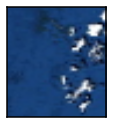

In [85]:
# epsg 3413

plt.close('all')
plt.figure(figsize=(8,8*double(data.shape[0])/data.shape[1]))
lat_ts=70.0
lat_0=90.0
lon_0=-45

# width=7000000.
# height=7000000.
# m = Basemap(width=width,height=height,resolution='l',\
#             projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)

# Lat/Lon coords of image corners
ll_lat = lats_2.min()
# ur_lat = lats_2.max()-4
# ll_lon = lons_2.min()-15
# ur_lon = lons_2.max()+10
ur_lat = lats_2.max()
ll_lon = lons_2.min()
ur_lon = lons_2.max()
cent_lat = lats_2.mean()
cent_lon = lons_2.mean()
m = Basemap(llcrnrlat=ll_lat, urcrnrlat=ur_lat,\
            llcrnrlon=ll_lon, urcrnrlon=ur_lon, \
            resolution='i', projection='stere', \
            lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)

m.bluemarble()

x,y=m(lons_2[::scale,::scale],lats_2[::scale,::scale])
CS=m.pcolormesh(x,y,roughnessNrmlzd['vv'],cmap=cm.Greys, vmin=-1, vmax=1)#,ps,cmap=cm.jet,extend='max')

m.drawmeridians(arange(lonlim[0],lonlim[1],5),labels=[0,0,0,1],color='y')
m.drawparallels(arange(0,80,5),labels=[1,0,0,0],color='y')
m.drawcoastlines(linewidth=0.5,color='0.5')
plt.title('Test')

In [ ]:
latlim

In [ ]:
import pyresample as pr

nc_path = os.path.join('/tmp', fn+'.nc')
if not os.path.isdir(os.path.dirname(nc_path)):
    os.makedirs(os.path.dirname(nc_path))

area_def_3413 = swath_area_def(
    name='Temporal SWATH EPSG Projection 3413', proj='stere',
    lonlim=lonlim, latlim=latlim,
    ellps="WGS84", res=pxlResSARm, lat_ts=70, lat_0=90, lon_0=-45
)

# sigma0w

p = polarization[0]

# sigma0w_res = pr.kd_tree.resample_nearest(
#     swath_def, sigma0w[p].ravel(), area_def_3413,
#     radius_of_influence=4*pxlResSARm_max,
#     epsilon=0.5, nprocs=numProcs, fill_value=None
# )

sigma0w_res = pr.kd_tree.resample_nearest(
    swath_def, sigma0w[p], area_def_3413,
    radius_of_influence=4*pxlResSARm.max(), epsilon=0.5, fill_value=None
)

In [ ]:
data=sigma0w_res[::20,::20]
ntrctv = widgets.interact(ntrctv_imshow, \
                 vmi=widgets.FloatSliderWidget(min=-35, max=5, value=-20, step=0.5), \
                 vma=widgets.FloatSliderWidget(min=-35, max=5, value=-5., step=0.5), \
                cmap = ['Greys_r', 'bone', 'RdBu_r'], crop = '[:,:]');
# crop = '[1000:2500,1500:-1]'
# crop = '[600:1400,0:900]' - finnGulf
# crop = '[500:800,600:1000]' - Prirazlomnoe

# Saving figures for presentation

In [ ]:
# Save images for presentation
# oPath = '/home/mag/tmp/for_Ania/'
oPath = inpath

for p in polarization:
    plt.close('all')
    oFileName = os.path.join(oPath, fn[:-39] + '_' + p + '_bone_r.png')
    plt.imshow(roughnessNrmlzd[p], vmin=-1, vmax=2, cmap=plt.cm.bone_r)
    plt.colorbar()
    plt.axis('tight')
    plt.savefig(oFileName, dpi=600,
                facecolor='None',
                bbox_inches='tight',
                transparent=True,
                pad_inches=0)

    plt.close('all')
    oFileName = os.path.join(oPath, fn[:-39] + '_' + p + '_RdBu_r.png')
    plt.imshow(roughnessNrmlzd[p], vmin=-1, vmax=2, cmap=plt.cm.RdBu_r)
    plt.colorbar()
    plt.axis('tight')
    plt.savefig(oFileName, dpi=600,
                facecolor='None',
                bbox_inches='tight',
                transparent=True,
                pad_inches=0)

plt.close('all')
oFileName = os.path.join(oPath, fn[:-39] + '_' + polarization[0] + '_sigma0w.png')
plt.imshow(10*log10(sigma0w[polarization[0]]), vmin=-20, vmax=-5)
plt.gray()
plt.colorbar()
plt.axis('tight')
plt.savefig(oFileName, dpi=600,
            facecolor='None',
            bbox_inches='tight',
            transparent=True,
            pad_inches=0)

plt.close('all')
oFileName = os.path.join(oPath, fn[:-39] + '_' + polarization[1] + '_sigma0w.png')
plt.imshow(10*log10(sigma0w[polarization[1]]), vmin=-35, vmax=-10)
plt.gray()
plt.colorbar()
plt.axis('tight')
plt.savefig(oFileName, dpi=600,
            facecolor='None',
            bbox_inches='tight',
            transparent=True,
            pad_inches=0)

In [ ]:
p = polarization[0]

min_speed = 0
max_speed = 9

plt.close('all')
oFileName = os.path.join(oPath, fn[:-39] + '_' + p + '_wind_ncep.png')
plt.imshow((ncepGFSmodelWind['wind_speed']), vmin=min_speed, vmax=max_speed, interpolation="nearest")
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver((ncepGFSmodelWind['u']), (ncepGFSmodelWind['v']))
plt.savefig(oFileName, dpi=600,
            facecolor='None',
            bbox_inches='tight',
            transparent=True,
            pad_inches=0)

X,Y = meshgrid( arange(0,roughness[p].shape[1]),arange(0,roughness[p].shape[0]) )
U = ncepGFSmodelWindSwath['u']
V = ncepGFSmodelWindSwath['v']
scl = 100

plt.close('all')
oFileName = os.path.join(oPath, fn[:-39] + '_' + p + '_wind_ncep_swath.png')
plt.imshow(ncepGFSmodelWindSwath['wind_speed'], vmin=min_speed, vmax=max_speed)
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])
plt.savefig(oFileName, dpi=600,
            facecolor='None',
            bbox_inches='tight',
            transparent=True,
            pad_inches=0)

plt.close('all')
oFileName = os.path.join(oPath, fn[:-39] + '_' + p + '_wind_S1.png')
plt.imshow(wind_speed_asar, vmin=min_speed, vmax=max_speed)
plt.jet()
plt.colorbar()
plt.axis('tight')
plt.quiver(X[::scl,::scl], Y[::scl,::scl], U[::scl,::scl], V[::scl,::scl])
plt.savefig(oFileName, dpi=600,
            facecolor='None',
            bbox_inches='tight',
            transparent=True,
            pad_inches=0)

In [ ]:
import sys
sys.getsizeof(sigma0[p])

In [ ]:
s1 = sigma0[p]

In [ ]:
import numpy as np
s1

In [ ]:
np.int16(s1).nbytes/1024/1024

In [ ]:
s1 = 0.5
np.int8(s1*127)

In [ ]:
m = roughnessNrmlzd['vv']
m = m - m.min() # Offset the image, no pixels are negative
m = 2**16*(m+m.max())/m.max() # scale
# m = m + 1
# m = 2**16*(m+1)/1
m = np.uint16(m)

In [ ]:
m.min()

In [ ]:
m.nbytes/1024/1024

In [ ]:
m.mean()

In [ ]:
m = roughnessNrmlzd['vv'][300:700,300:700]
m = np.where(m<=-1,-0.9999,m)
m = np.where(m>=1,0.9999,m)
m = m - m.min() # Offset the image, no pixels are negative # 0-2
m = 2**16*m/m.max() # scale # 65000*(m)/2
m = np.uint16(m)

plt.close('all')
plt.figure(figsize=(32,32*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.imshow(m, vmin=55*256, vmax=106*256)
plt.colorbar()

In [ ]:
m = roughnessNrmlzd['vv'][300:700,300:700]
m = np.where(m<=-1,-0.9999,m)
m = np.where(m>=1,0.9999,m)
m = m - m.min() # Offset the image, no pixels are negative # 0-2
m = 2**8*m/m.max() # scale # 65000*(m)/2
m = np.uint8(m)

plt.close('all')
plt.figure(figsize=(32,32*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.imshow(m, vmin=55, vmax=106)
plt.colorbar()

In [ ]:
plt.close('all')
plt.imshow(incidenceAngle_2[p][::scale,::scale])

In [ ]:
plt.close('all')
plt.plot(sigma0wAvg[p])
plt.plot(sigma0w[p].mean(axis=0), 'g')

In [ ]:
plt.close('all')
plt.figure(figsize=(16,12))
plt.imshow(roughness[p], vmin=0, vmax=0.01)
# plt.imshow(roughness[p], vmin=0, vmax=0.1)
plt.gray()

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16))
plt.imshow(roughnessNrmlzd[p], vmin=-1, vmax=1)
plt.set_cmap('bone_r')
# plt.set_cmap('seismic')
# plt.set_cmap('RdBu_r')


In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.subplot(121)
plt.imshow(roughness[p], vmin=0, vmax=0.1)
plt.gray()
plt.colorbar()
plt.title(p)
plt.subplot(122)
plt.imshow(roughnessNrmlzd[p], vmin=-1, vmax=1)
plt.gray()
plt.colorbar()
plt.title(p + ' Nrmlzd')

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16))
plt.imshow(roughnessNrmlzd[p], vmin=-1, vmax=1)
# plt.set_cmap('bone_r')
# plt.set_cmap('seismic')
plt.set_cmap('RdBu_r')


In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[polarization[0]].shape[0])/double(sigma0w[polarization[0]].shape[1])))
plt.subplot(131)
plt.imshow(10*log10(sigma0w[polarization[0]]), vmin=-20, vmax=5)
plt.gray()
plt.colorbar()
plt.title(polarization[0])
plt.subplot(132)
plt.imshow(10*log10(sigma0w[polarization[1]]), vmin=-30, vmax=5)
plt.gray()
plt.colorbar()
plt.title(polarization[1])
# plt.subplot(133)
# plt.imshow(roughness[polarization[0]][::scale,::scale], vmin=0, vmax=roughness[polarization[0]].mean())
# plt.gray()
# plt.colorbar()
# plt.title(polarization[0])

In [ ]:
# Adding Model wind

startTime = datetime.datetime.strptime(\
                              manifest['xfdu:XFDU']['metadataSection']['metadataObject'][12]\
                              ['metadataWrap']['xmlData']['safe:acquisitionPeriod']['safe:startTime'],\
                              "%Y-%m-%dT%H:%M:%S.%f")

ncepGFSmodelWind = ncepGFSmodel(startTime, lats_2, lons_2)

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.subplot(121)
plt.imshow(ncepGFSmodelWind['wind_speed'])
plt.jet()
plt.colorbar()
plt.subplot(122)
plt.imshow(ncepGFSmodelWind['wind_dir'])
plt.jet()
plt.colorbar()


In [ ]:
# plt.close('all')
# plt.figure(figsize=(16,4))
# plt.subplot(121)
# plt.imshow(ncepGFSmodelWind['lats_wind'])
# plt.jet()
# plt.colorbar()
# plt.subplot(122)
# plt.imshow(ncepGFSmodelWind['lons_wind'])
# plt.jet()
# plt.colorbar()

In [ ]:
# plt.close('all')
# plt.plot(ncepGFSmodelWind['lons_wind'][0,:])
# plt.plot(ncepGFSmodelWind['lats_wind'][:,0])

In [ ]:
# Reprojecting data

import distancelib

# Pixel resolution
# we use pxlResWind/pxlResSAR for further pyresample radius_of_influence and sigmas
pxlResWind = asarray(distancelib.getPixelResolution(ncepGFSmodelWind['lats_wind'], \
                                                    ncepGFSmodelWind['lons_wind'], \
                                                    ncepGFSmodelWind['lons_wind'].shape, 'km'))
# pxlResSAR  = asarray(distancelib.getPixelResolution(lats_2, lons_2, lons_2.shape, 'km'))*1e3

# Note pxlResWind is in KM, multiply by 1e3 for meters
print "S1 cell resolution, %s m"  % pxlResSARm
print "Wind cell resolution, %s km" % pxlResWind

In [ ]:
from scipy.interpolate import RectSphereBivariateSpline

def ncepGFSmodel2swath(lats, lons, data, lats_2, lons_2):

    func = RectSphereBivariateSpline(lats, lons, data)
    data_2 = func.ev(lats_2.ravel()*pi/180, \
                     lons_2.ravel()*pi/180)\
                     .reshape(lats_2.shape)
    return data_2


In [ ]:
# reproject NCEP onto S1 grid before calculations
# Using RectSphereBivariateSpline - Bivariate spline approximation over a rectangular mesh on a sphere
# as it is much more efficiant for full resolution
# as well as smoothes nicely the image

# We don't want to work with full res wind so scaling the image for about 100m resolution
# Adjust scale to get appropriate value
# scale = 5

lts = flipud(ncepGFSmodelWind['lats_wind'])[:,0]*pi/180
lns = ncepGFSmodelWind['lons_wind'][0,:]*pi/180
data = flipud(ncepGFSmodelWind['wind_speed'])
data2 = flipud(ncepGFSmodelWind['wind_dir'])

lts_2 = lats_2[::scale,::scale]
lns_2 = lons_2[::scale,::scale]

wind_speed_model_swath = ncepGFSmodel2swath(lts, lns, data, lts_2, lns_2)
wind_dir_model_swath   = ncepGFSmodel2swath(lts, lns, data2, lts_2, lns_2)

del data, data2
    
pxlResWindSwath = asarray(distancelib.getPixelResolution(lts_2, \
                                                    lns_2, \
                                                    lns_2.shape, 'km'))
print "Interpolated Wind cell resolution, %s km" % pxlResWindSwath


In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[polarization[0]].shape[0])/double(sigma0w[polarization[0]].shape[1])))
plt.subplot(121)
plt.imshow(wind_speed_model_swath[::33,::33])
plt.jet()
plt.colorbar()
plt.subplot(122)
plt.imshow(wind_dir_model_swath[::33,::33])
plt.jet()
plt.colorbar()

In [ ]:
# calculate bearing from initial lats/lons for further wind calculation
# Taking initial values as bearing is more accurate after interpolation than vice versa
bearing = zeros((GEOgrid['lons'].shape[0]-1,GEOgrid['lons'].shape[1]))

for n in range(0,GEOgrid['lons'].shape[1]):
    col = ([GEOgrid['lats'][:-1,n], GEOgrid['lons'][:-1,n]], [GEOgrid['lats'][1:,n], GEOgrid['lons'][1:,n]])
    for m in range(0,GEOgrid['lons'].shape[0]-1):
        bearing[m][n] = distancelib.bearing(asarray(col[0])[:,m], asarray(col[1])[:,m])

# interpolate to raw_counts.shape
bearing_2 = imresize(bearing, wind_dir_model_swath.shape)

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.imshow(bearing_2)
plt.jet()
plt.colorbar()

In [ ]:
# # Wind Speed

# windSpeed = {}

# # the C-2PO (C-band Cross-Polarized Ocean) model
# # B. Zhang and W. Perrie, Cross-polarized synthetic aperture radar:
# # A new potential measurement technique for hurricanes, Bull. Amer. Meteor. Soc., pp. 531-541, 2012.
# if 'vh' in polarization:
#     windSpeed['vh'] = (10*log10(sigma0w['vh']) + 35.652)/0.58
# if 'hv' in polarization:
#     windSpeed['hv'] = (10*log10(sigma0w['hv']) + 35.652)/0.58

# # convert the signal measured in HH into VV polarization before using a GMF from the CMOD family
# if 'hh' in polarization:
#     alpha=1 # for Sentinel Toolbox alpha=1, initially it was 0.6
#     sigma0w['hh2vv'] = sigma0w['hh']*(1+2*tan(incidenceAngle_2['hh'])**2)**2/(1+alpha*tan(incidenceAngle_2['hh'])**2)**2

# plt.close('all')
# plt.figure(figsize=(16,16/3*double(sigma0w[polarization[0]].shape[0])/double(sigma0w[polarization[0]].shape[1])))
# plt.imshow(windSpeed['vh'][::33,::33], vmin=0, vmax=20)
# plt.jet()
# plt.colorbar()

In [ ]:
scale

In [ ]:
#NB! WINDDIR = 0 WHEN WIND BLOWS TOWARDS RADAR!
wind_dir_model_swath_rel = 90 + bearing_2 - wind_dir_model_swath
try:
    from cmod_gpu import rcs2windOpenCl
    wind_speed_asar = rcs2windOpenCl(sar=sigma0w[p], \
                                     windir=wind_dir_model_swath_rel, \
                                     theta=incidenceAngle_2[p][::scale,::scale])
except Exception:
    from cmod_vect import rcs2windPar
    wind_speed_asar = rcs2windPar(sigma0w[p], cmdv=5, \
                                  windir=wind_dir_model_swath_rel, \
                                  theta=incidenceAngle_2[p][::scale,::scale], nprocs=numProcs)

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.plot(wind_speed_model_swath[500,:])
plt.plot(wind_speed_asar[500,:])

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.plot(wind_speed_model_swath[:,1500])
plt.plot(wind_speed_asar[:,1500])

In [ ]:
plt.close('all')
plt.figure(figsize=(16,16/3*double(sigma0w[p].shape[0])/double(sigma0w[p].shape[1])))
plt.subplot(121)
plt.imshow(wind_speed_model_swath, vmin=3, vmax=10)
plt.jet()
plt.colorbar()
plt.subplot(122)
plt.imshow(wind_speed_asar, vmin=3, vmax=10)
plt.jet()
plt.colorbar()

In [ ]:
# Reprojecting data


roughness_4326, scaling, intercept = pr.kd_tree.resample_nearest(swath_def, roughnessNrmlzd, area_def_4326, \
                                             radius_of_influence=4*pxlResSARm.max(), epsilon=0.5, fill_value=None)

In [ ]:
# Save png image and kml file

import simplekml

def create_KML_asar(area_extent, savepath):
    kml = simplekml.Kml()

    pol = kml.newpolygon(name='area_extent', visibility=1)
    pol.tessellate = 1

    pol.altitudemode = 'clampToGround'
    pol.outerboundaryis.coords = [(area_extent[0], area_extent[1]), (area_extent[2], area_extent[3])]
    if type(savepath) == list:
        for _savepath in savepath:
            kml.save(_savepath)
    else:
        kml.save(savepath)

oPath = '/home/mag/tmp/'
oFileName = os.path.join(oPath, fn+'.png')

close('all')
gray()
imsave(oFileName, roughness_masked, vmin=0, vmax=2)
create_KML_asar(area_def.area_extent, os.path.join(oPath, fn+'.kml'))

In [ ]:
# Generate tiles

import gdal
import sys
sys.path.append('/usr/bin')
from gdal2tiles import GDAL2Tiles

def create_asar_tiles(png_filename, tiles_output_dir, proj):
    local_argv = ['/usr/bin/gdal2tiles.py', '-p', 'raster', '-r', 'cubic',
                  '-s', proj, png_filename, tiles_output_dir]
    argv = gdal.GeneralCmdLineProcessor(local_argv)
    if argv:
        gdal2tiles = GDAL2Tiles(argv[1:])
        gdal2tiles.process()

create_KML_asar(area_def.area_extent, os.path.join(_path, fileName+'.kml'))

tiles_3413_output_dir = os.path.join(oPath, 'tiles')
png_3413_filename = oFileName
create_asar_tiles(png_3413_filename, tiles_3413_output_dir, 'EPSG:3413')

In [ ]:
# Check the lat/lon/incidenceAngle after interpolation

print diff([GEOgrid['incidenceAngle'].min(),incidenceAngle_2.min()])
print diff([GEOgrid['incidenceAngle'].max(),incidenceAngle_2.max()])

print diff([GEOgrid['lats'].min(),lats_2.min()])
print diff([GEOgrid['lats'].max(), lats_2.max()])

print diff([GEOgrid['lons'].min(), lons_2.min()])
print diff([GEOgrid['lons'].max(), lons_2.max()])

plt.close('all')
plt.figure(figsize=(16,14))

plt.subplot(321)
plt.plot(range(0,raw_counts.shape[1]), lats_2[0,:])
plt.plot(GEOgrid['pixel'][0,:], GEOgrid['lats'][0,:], 'r.')
plt.hold
plt.plot(range(0,raw_counts.shape[1]), lats_2[-1,:])
plt.plot(GEOgrid['pixel'][-1,:], GEOgrid['lats'][-1,:], 'k.')

plt.subplot(322)
plt.plot(range(0,raw_counts.shape[0]), lats_2[:,0])
plt.plot(GEOgrid['line'][:,0], GEOgrid['lats'][:,0], 'r.')
plt.hold
plt.plot(range(0,raw_counts.shape[0]), lats_2[:,-1])
plt.plot(GEOgrid['line'][:,-1], GEOgrid['lats'][:,-1], 'k.')

plt.subplot(323)
plt.plot(range(0,raw_counts.shape[1]), incidenceAngle_2[0,:])
plt.plot(GEOgrid['pixel'][0,:], GEOgrid['incidenceAngle'][0,:], 'r.')
plt.hold
plt.plot(range(0,raw_counts.shape[1]), incidenceAngle_2[-1,:])
plt.plot(GEOgrid['pixel'][-1,:], GEOgrid['incidenceAngle'][-1,:], 'k.')

plt.subplot(324)
plt.plot(range(0,raw_counts.shape[0]), incidenceAngle_2[:,0])
plt.plot(GEOgrid['line'][:,0], GEOgrid['incidenceAngle'][:,0], 'r.')
plt.hold
plt.plot(range(0,raw_counts.shape[0]), incidenceAngle_2[:,-1])
plt.plot(GEOgrid['line'][:,-1], GEOgrid['incidenceAngle'][:,-1], 'k.')

plt.subplot(325)
plt.plot(range(0,raw_counts.shape[1]), sigmaNought_2[0,:])
plt.plot(cLUTs['pixel'][0,::10], cLUTs['sigmaNought'][0,::10], 'r.')

plt.subplot(326)
plt.plot(range(0,raw_counts.shape[0]), sigmaNought_2[:,0])
plt.plot(cLUTs['line'][:,0], cLUTs['sigmaNought'][:,0], 'r.')

In [ ]:
lats_2[5465,10215], lons_2[5465,10215], incidenceAngle_2[p][5465,10215], sigma0[p][5465,10215]

In [ ]:
print arcsin((4.740000e+02/6.666194e+02)**2)*180/pi, incidenceAngle_2[p][0,0]
print arcsin((4.740000e+02/5.596816e+02)**2)*180/pi, incidenceAngle_2[p][-1,-1]

In [ ]:
from osgeo import gdal

ds = gdal.Open(inpath + fileLocation['s1aiwgrd' + polarization])
ds.RasterCount

In [ ]:
ds = gdal.Open('/media/data/data/OTHER/RS2 Agulhas and Lion/RS2_SQA_1xQGSS20091224_164846_00000004/imagery_HV.tif')
ds.RasterCount

In [ ]:
ds = gdal.Open('/media/SOLabNFS2/tmp/sentinel-1/S1A_IW_SLC__1SDV_20141003T151001_20141003T151028_002667_002F87_7088.SAFE/measurement/s1a-iw1-slc-vv-20141003t151002-20141003t151027-002667-002f87-004.tiff')
slc = ds.ReadAsArray()
slc.dtype
del slc

In [ ]:
# ----------------------------------
# from scipy.interpolate import griddata
# from numpy import meshgrid, linspace

# Slant Range, Single-Look Complex (SLC) products
# are images in the slant range by azimuth imaging plane,
# in the image plane of satellite data acquisition.
# THAT MEANS that they must be interpolated more carefully using slantRangeTime and azimuthTime as in ASAR

# create new grid of raw_counts shape
# line_2, pixel_2 = meshgrid(linspace(0, lats.shape[0], raw_counts.shape[0]), linspace(0, lats.shape[1], raw_counts.shape[1]))
# Interpolate onto a new grid
# lats_2 = griddata((line.ravel(), pixel.ravel()), lats.ravel(), (line_2, pixel_2), method='cubic')
# lons_2 = griddata((line.ravel(), pixel.ravel()), lons.ravel(), (line_2, pixel_2), method='cubic')


In [ ]:
#     # Nice Image (Roughness)
#     if p == 'hh':
#         ph = (2.20495, -14.3561e-2, 11.28e-4)
#         sigma0_hh_ref = exp( ( ph[0]+incidenceAngle_2[p]*ph[1]+incidenceAngle_2[p]**2*ph[2])*log(10) )
#         roughness[p] = sigma0w[p]/sigma0_hh_ref
#     elif p == 'vv':
#         pv = (2.29373, -15.393e-2, 15.1762e-4)
#         sigma0_vv_ref = exp( ( pv[0]+incidenceAngle_2[p]*pv[1]+incidenceAngle_2[p]**2*pv[2])*log(10) )
#         roughness[p] = sigma0w[p]/sigma0_vv_ref